In [2]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [5]:
df = pd.read_csv('downloads/disciplinarity/master.csv')
#df.drop(index = [*range(114)],axis=0, inplace =True)
df.rename(columns = {'0' :'TEXT'},inplace=True)
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.drop(index=[63, 76],inplace = True) #doc 64,77 (at index 63,76) failed to convert from pdf.
df =df.sort_values(['YEAR'])
df['TEXT'] = df['TEXT'].astype(str)

In [9]:
df.head(3)

,TEXT,DOC,YEAR,LAST,FIRST,TITLE,PUBLICATION
108,coy cecel aloin 1940 wh re mcl oo anu...,doc109,1938,Benjamin,Walter,"Paris, Capital of the 19th Century","Paris, Capital of the 19th Century (book)"
107,a home is not a housereyner banham illustrated...,doc108,1965,Banham,Reyner,Home is not a House,Art in America
24,chapter classifyingi what the historians sayhi...,doc25,1966,Foucault,Michel,Classifying,The Order of Things


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(df['TEXT'].tolist())
doc_word.shape

(159, 75639)

In [67]:
dxt = pd.DataFrame(doc_word.toarray(), index=df.index, columns=vectorizer.get_feature_names())

In [72]:
dxt['TOTAL'] = dxt.sum(axis=1)

In [73]:
dxt = pd.concat([dxt, df['YEAR'],df['TITLE']], axis=1)

In [74]:
cols = dxt.columns.tolist()
cols = cols[-3:] + cols[:-3]
dxt = dxt[cols]

In [97]:
dxt.drop(index=[108],inplace=True)

In [98]:
dxt.head()

,TOTAL,YEAR,TITLE,00,000,000000,000000000000,0000000000000,00010,00028,...,zuriick,zvi,zwemmer,zwiefalt,zwiegespriich,zwischenstation,zworikin,zy,zyberk,zz
107,2575.0,1965,Home is not a House,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,7927.0,1966,Classifying,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,1024.0,1967,The Commodity as Spectacle,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,1062.0,1969,Sixth Series on Serialization,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,9518.0,1969,Toward a Critique of Architectural ideology,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X = dxt.groupby(['YEAR']).sum()


In [154]:
stuff = (5000*((X['theory']+1) / X['TOTAL'])).to_numpy()

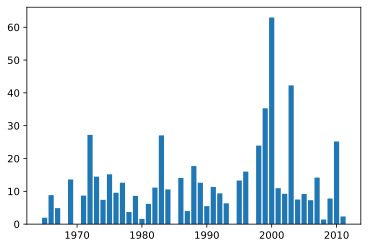

In [155]:
%config InlineBackend.figure_format = 'svg'
plt.bar(dxt.YEAR.unique(), stuff);
plt.savefig('pizza.svg')

6e-06